In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [3]:
# Load the energy demand data
load_data = pd.read_csv(
    "data/PJM_Load_hourly.csv",
    parse_dates=["Datetime"],  # Parse the Datetime column
    index_col="Datetime",  # Use Datetime as index
)

In [6]:
# Load the temperature data
temp_data = pd.read_csv(
    "data/Temperature_hourly.csv",
    parse_dates=["DATE"],  # Parse the Date (UTC) column
    index_col="DATE",  # Use Date (UTC) as index
)

# Rename the temperature index to match the load data
temp_data.index.name = "Datetime"

In [7]:
# Display the first few rows of each dataset
print("Energy Demand Data:")
display(load_data.head())

print("\nTemperature Data:")
display(temp_data.head())

# Check the data types and non-null values
print("\nEnergy Data Info:")
display(load_data.info())

print("\nTemperature Data Info:")
display(temp_data.info())

Energy Demand Data:


,PJM_Load_MW
Datetime,
1998-12-31 01:00:00,29309.0
1998-12-31 02:00:00,28236.0
1998-12-31 03:00:00,27692.0
1998-12-31 04:00:00,27596.0
1998-12-31 05:00:00,27888.0



Temperature Data:


,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HLY-TEMP-NORMAL,HLY-PRES-NORMAL,HLY-DEWP-NORMAL
Datetime,,,,,,,,
2010-01-01 00:00:00,GHCND:USW00003812,ASHEVILLE REGIONAL AIRPORT NC US,645.3,35.43194,-82.5375,349,10205,289
2010-01-01 01:00:00,GHCND:USW00003812,ASHEVILLE REGIONAL AIRPORT NC US,645.3,35.43194,-82.5375,344,10202,287
2010-01-01 02:00:00,GHCND:USW00003812,ASHEVILLE REGIONAL AIRPORT NC US,645.3,35.43194,-82.5375,339,10200,284
2010-01-01 03:00:00,GHCND:USW00003812,ASHEVILLE REGIONAL AIRPORT NC US,645.3,35.43194,-82.5375,334,10202,283
2010-01-01 04:00:00,GHCND:USW00003812,ASHEVILLE REGIONAL AIRPORT NC US,645.3,35.43194,-82.5375,331,10202,280



Energy Data Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32896 entries, 1998-12-31 01:00:00 to 2010-01-02 00:00:00
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PJM_Load_MW  32896 non-null  float64
dtypes: float64(1)
memory usage: 514.0 KB


None


Temperature Data Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 744 entries, 2010-01-01 00:00:00 to 2010-01-31 23:00:00
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATION          744 non-null    object 
 1   STATION_NAME     744 non-null    object 
 2   ELEVATION        744 non-null    float64
 3   LATITUDE         744 non-null    float64
 4   LONGITUDE        744 non-null    float64
 5   HLY-TEMP-NORMAL  744 non-null    int64  
 6   HLY-PRES-NORMAL  744 non-null    int64  
 7   HLY-DEWP-NORMAL  744 non-null    int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 52.3+ KB


None

In [33]:
# First, ensure both dataframes have the same index name
load_data.index.name = "Datetime"
temp_data.index.name = "Datetime"

# Perform the inner join
merged_data = pd.merge(
    load_data,  # Left table (load data)
    temp_data,  # Right table (temperature data)
    left_index=True,  # Use index from left table
    right_index=True,  # Use index from right table
    how="inner",  # Inner join
)

# Make temperature with decimal
merged_data["HLY-TEMP-NORMAL"] = merged_data["HLY-TEMP-NORMAL"] / 10

# Display the first few rows of the merged data
print("Merged Data:")
display(merged_data.head())

# Show info about the merged data
print("\nMerged Data Info:")
display(merged_data.info())

# Sort the index for both dataframes
load_data = load_data.sort_index()
temp_data = temp_data.sort_index()

# Check if the index is sorted
print("Is load_data index sorted?", load_data.index.is_monotonic_increasing)
print("Is temp_data index sorted?", temp_data.index.is_monotonic_increasing)

Merged Data:


,PJM_Load_MW,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HLY-TEMP-NORMAL,HLY-PRES-NORMAL,HLY-DEWP-NORMAL
Datetime,,,,,,,,,
2010-01-01 00:00:00,31128.0,GHCND:USW00003812,ASHEVILLE REGIONAL AIRPORT NC US,645.3,35.43194,-82.5375,34.9,10205,289
2010-01-01 01:00:00,29875.0,GHCND:USW00003812,ASHEVILLE REGIONAL AIRPORT NC US,645.3,35.43194,-82.5375,34.4,10202,287
2010-01-01 02:00:00,28847.0,GHCND:USW00003812,ASHEVILLE REGIONAL AIRPORT NC US,645.3,35.43194,-82.5375,33.9,10200,284
2010-01-01 03:00:00,27916.0,GHCND:USW00003812,ASHEVILLE REGIONAL AIRPORT NC US,645.3,35.43194,-82.5375,33.4,10202,283
2010-01-01 04:00:00,27449.0,GHCND:USW00003812,ASHEVILLE REGIONAL AIRPORT NC US,645.3,35.43194,-82.5375,33.1,10202,280



Merged Data Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 744 entries, 2010-01-01 00:00:00 to 2010-01-31 23:00:00
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PJM_Load_MW      744 non-null    float64
 1   STATION          744 non-null    object 
 2   STATION_NAME     744 non-null    object 
 3   ELEVATION        744 non-null    float64
 4   LATITUDE         744 non-null    float64
 5   LONGITUDE        744 non-null    float64
 6   HLY-TEMP-NORMAL  744 non-null    float64
 7   HLY-PRES-NORMAL  744 non-null    int64  
 8   HLY-DEWP-NORMAL  744 non-null    int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 58.1+ KB


None

Is load_data index sorted? True
Is temp_data index sorted? True


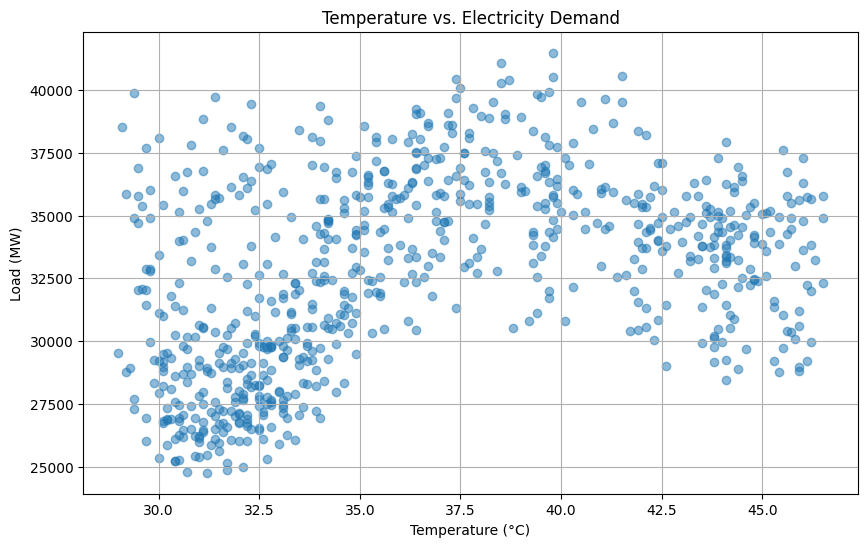

In [34]:
plt.figure(figsize=(10,6))
plt.scatter(merged_data["HLY-TEMP-NORMAL"], merged_data["PJM_Load_MW"], alpha=0.5)
plt.title("Temperature vs. Electricity Demand")
plt.xlabel("Temperature (°C)")
plt.ylabel("Load (MW)")
plt.grid()
plt.show()

In [35]:
merged_data["hour"] = merged_data.index.hour
merged_data["day_of_week"] = merged_data.index.dayofweek
merged_data["month"] = merged_data.index.month

# Create a "is_weekend" feature (a column that shows 1 if weekend else 0)
merged_data["is_weekend"] = merged_data["day_of_week"].apply(lambda x: 1 if x >= 5 else 0)

# create is peak feature (e.g., 7 AM - 11 PM on weekdays)(a column that shows 1 if peak else 0)
# The axis=1 tells pandas to apply the function row-wise (across columns) instead of column-wise. This is necessary because we're checking values from multiple columns in each row.
merged_data["is_peak"] = merged_data.apply(
    lambda row: 1
    if (row["is_weekend"] == 0 and row["hour"] >= 7 and row["hour"] <= 23)
    else 0,
    axis=1,
)

# Define features and target
features = ["HLY-TEMP-NORMAL", "hour", "day_of_week", "month", "is_weekend", "is_peak"]
X = merged_data[features]
y = merged_data["PJM_Load_MW"]

print(X.head())

                     HLY-TEMP-NORMAL  hour  day_of_week  month  is_weekend  \
Datetime                                                                     
2010-01-01 00:00:00             34.9     0            4      1           0   
2010-01-01 01:00:00             34.4     1            4      1           0   
2010-01-01 02:00:00             33.9     2            4      1           0   
2010-01-01 03:00:00             33.4     3            4      1           0   
2010-01-01 04:00:00             33.1     4            4      1           0   

                     is_peak  
Datetime                      
2010-01-01 00:00:00        0  
2010-01-01 01:00:00        0  
2010-01-01 02:00:00        0  
2010-01-01 03:00:00        0  
2010-01-01 04:00:00        0  


In [36]:
# Split into train and test sets
# train from 80% of data then test if it works on the 20% of unseen data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

RMSE: 2010.24 MW


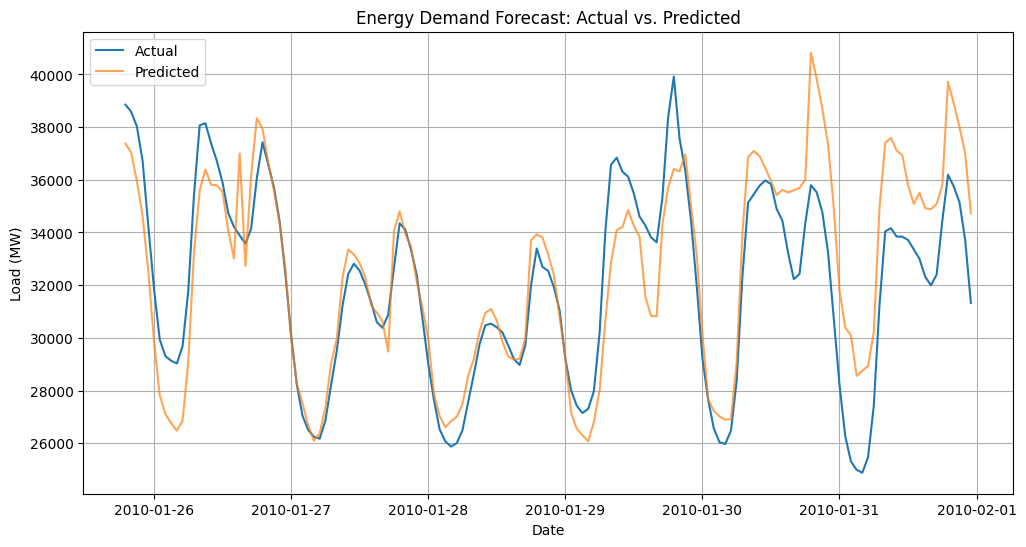

In [41]:
from math import sqrt

mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)  # Manually calculate square root of MSE
print(f"RMSE: {rmse:.2f} MW")

# Plot actual vs. predicted
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label="Actual")
plt.plot(y_test.index, y_pred, label="Predicted", alpha=0.7)
plt.title("Energy Demand Forecast: Actual vs. Predicted")
plt.xlabel("Date")
plt.ylabel("Load (MW)")
plt.legend()
plt.grid()
plt.show()


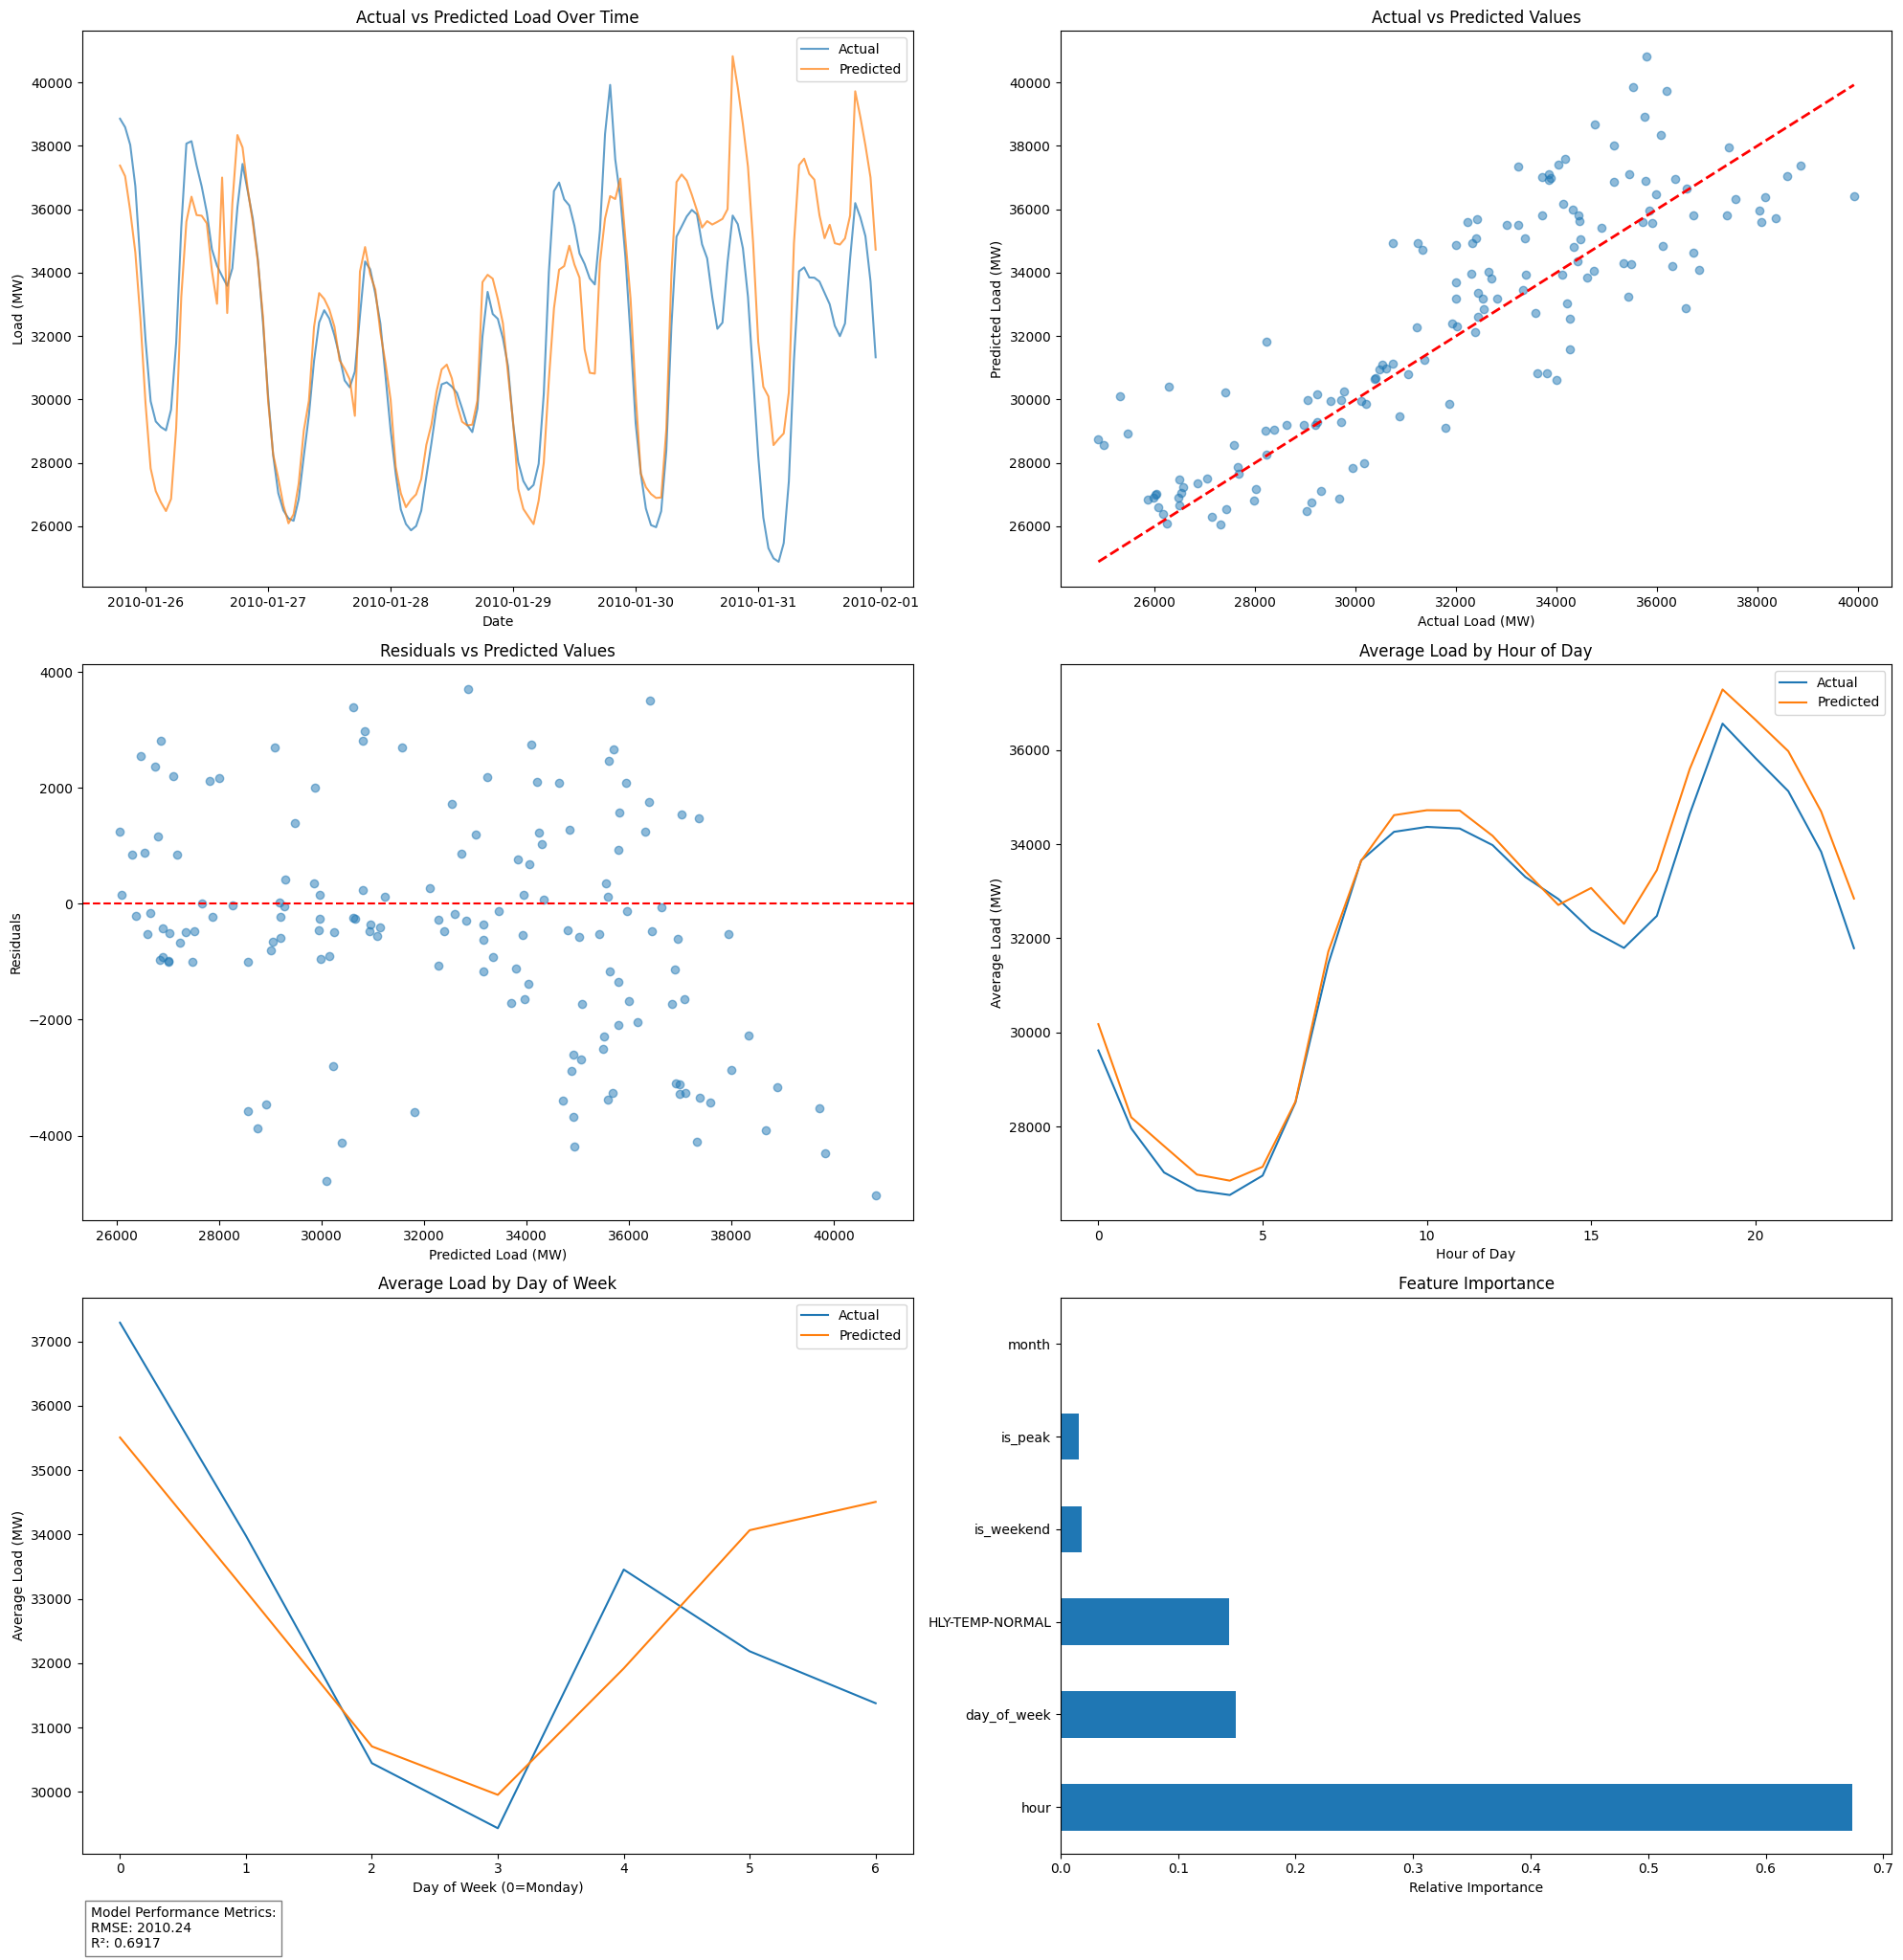

In [51]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Use a built-in matplotlib style
plt.style.use("default")

# Create a figure with multiple subplots
fig = plt.figure(figsize=(20, 20))

# 1. Actual vs Predicted Time Series
ax1 = plt.subplot(3, 2, 1)
ax1.plot(X_test.index, y_test, label="Actual", alpha=0.7)
ax1.plot(X_test.index, y_pred, label="Predicted", alpha=0.7)
ax1.set_title("Actual vs Predicted Load Over Time")
ax1.set_xlabel("Date")
ax1.set_ylabel("Load (MW)")
ax1.legend()

# 2. Scatter plot of Actual vs Predicted
ax2 = plt.subplot(3, 2, 2)
ax2.scatter(y_test, y_pred, alpha=0.5)
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2)
ax2.set_title("Actual vs Predicted Values")
ax2.set_xlabel("Actual Load (MW)")
ax2.set_ylabel("Predicted Load (MW)")

# 3. Residual Plot
residuals = y_test - y_pred
ax3 = plt.subplot(3, 2, 3)
ax3.scatter(y_pred, residuals, alpha=0.5)
ax3.axhline(y=0, color="r", linestyle="--")
ax3.set_title("Residuals vs Predicted Values")
ax3.set_xlabel("Predicted Load (MW)")
ax3.set_ylabel("Residuals")

# 4. Hourly Pattern
hourly_actual = y_test.groupby(X_test["hour"]).mean()
hourly_pred = pd.Series(y_pred, index=X_test.index).groupby(X_test["hour"]).mean()
ax4 = plt.subplot(3, 2, 4)
hourly_actual.plot(label="Actual", ax=ax4)
hourly_pred.plot(label="Predicted", ax=ax4)
ax4.set_title("Average Load by Hour of Day")
ax4.set_xlabel("Hour of Day")
ax4.set_ylabel("Average Load (MW)")
ax4.legend()

# 5. Day of Week Pattern
dow_actual = y_test.groupby(X_test["day_of_week"]).mean()
dow_pred = pd.Series(y_pred, index=X_test.index).groupby(X_test["day_of_week"]).mean()
ax5 = plt.subplot(3, 2, 5)
dow_actual.plot(label="Actual", ax=ax5)
dow_pred.plot(label="Predicted", ax=ax5)
ax5.set_title("Average Load by Day of Week")
ax5.set_xlabel("Day of Week (0=Monday)")
ax5.set_ylabel("Average Load (MW)")
ax5.legend()

# 6. Feature Importance
feature_importance = pd.Series(model.feature_importances_, index=features)
feature_importance = feature_importance.sort_values(ascending=False)
ax6 = plt.subplot(3, 2, 6)
feature_importance.plot(kind="barh", ax=ax6)
ax6.set_title("Feature Importance")
ax6.set_xlabel("Relative Importance")

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Add metrics to the plot
plt.figtext(
    0.05,  # x position (0 is left, 1 is right)
    -0.02,  # y position (negative moves it below the figure)
    f"Model Performance Metrics:\nRMSE: {rmse:.2f}\nR²: {r2:.4f}",
    bbox=dict(facecolor="white", alpha=0.5),
    ha="left",  # horizontal alignment
)


plt.tight_layout()
plt.show()


In [52]:
# Define features and target
features = [
    "HLY-TEMP-NORMAL",
    "hour",
    "day_of_week",
    "month",
    "is_weekend",
    "is_peak",
    "ELEVATION",
    "LATITUDE",
    "LONGITUDE",
    "HLY-DEWP-NORMAL",
    "HLY-PRES-NORMAL",
]
X = merged_data[features]
y = merged_data["PJM_Load_MW"]

print(X.head())

# Split into train and test sets
# train from 80% of data then test if it works on the 20% of unseen data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)  # Manually calculate square root of MSE
print(f"RMSE: {rmse:.2f} MW")

                     HLY-TEMP-NORMAL  hour  day_of_week  month  is_weekend  \
Datetime                                                                     
2010-01-01 00:00:00             34.9     0            4      1           0   
2010-01-01 01:00:00             34.4     1            4      1           0   
2010-01-01 02:00:00             33.9     2            4      1           0   
2010-01-01 03:00:00             33.4     3            4      1           0   
2010-01-01 04:00:00             33.1     4            4      1           0   

                     is_peak  ELEVATION  LATITUDE  LONGITUDE  HLY-DEWP-NORMAL  \
Datetime                                                                        
2010-01-01 00:00:00        0      645.3  35.43194   -82.5375              289   
2010-01-01 01:00:00        0      645.3  35.43194   -82.5375              287   
2010-01-01 02:00:00        0      645.3  35.43194   -82.5375              284   
2010-01-01 03:00:00        0      645.3  35.4319

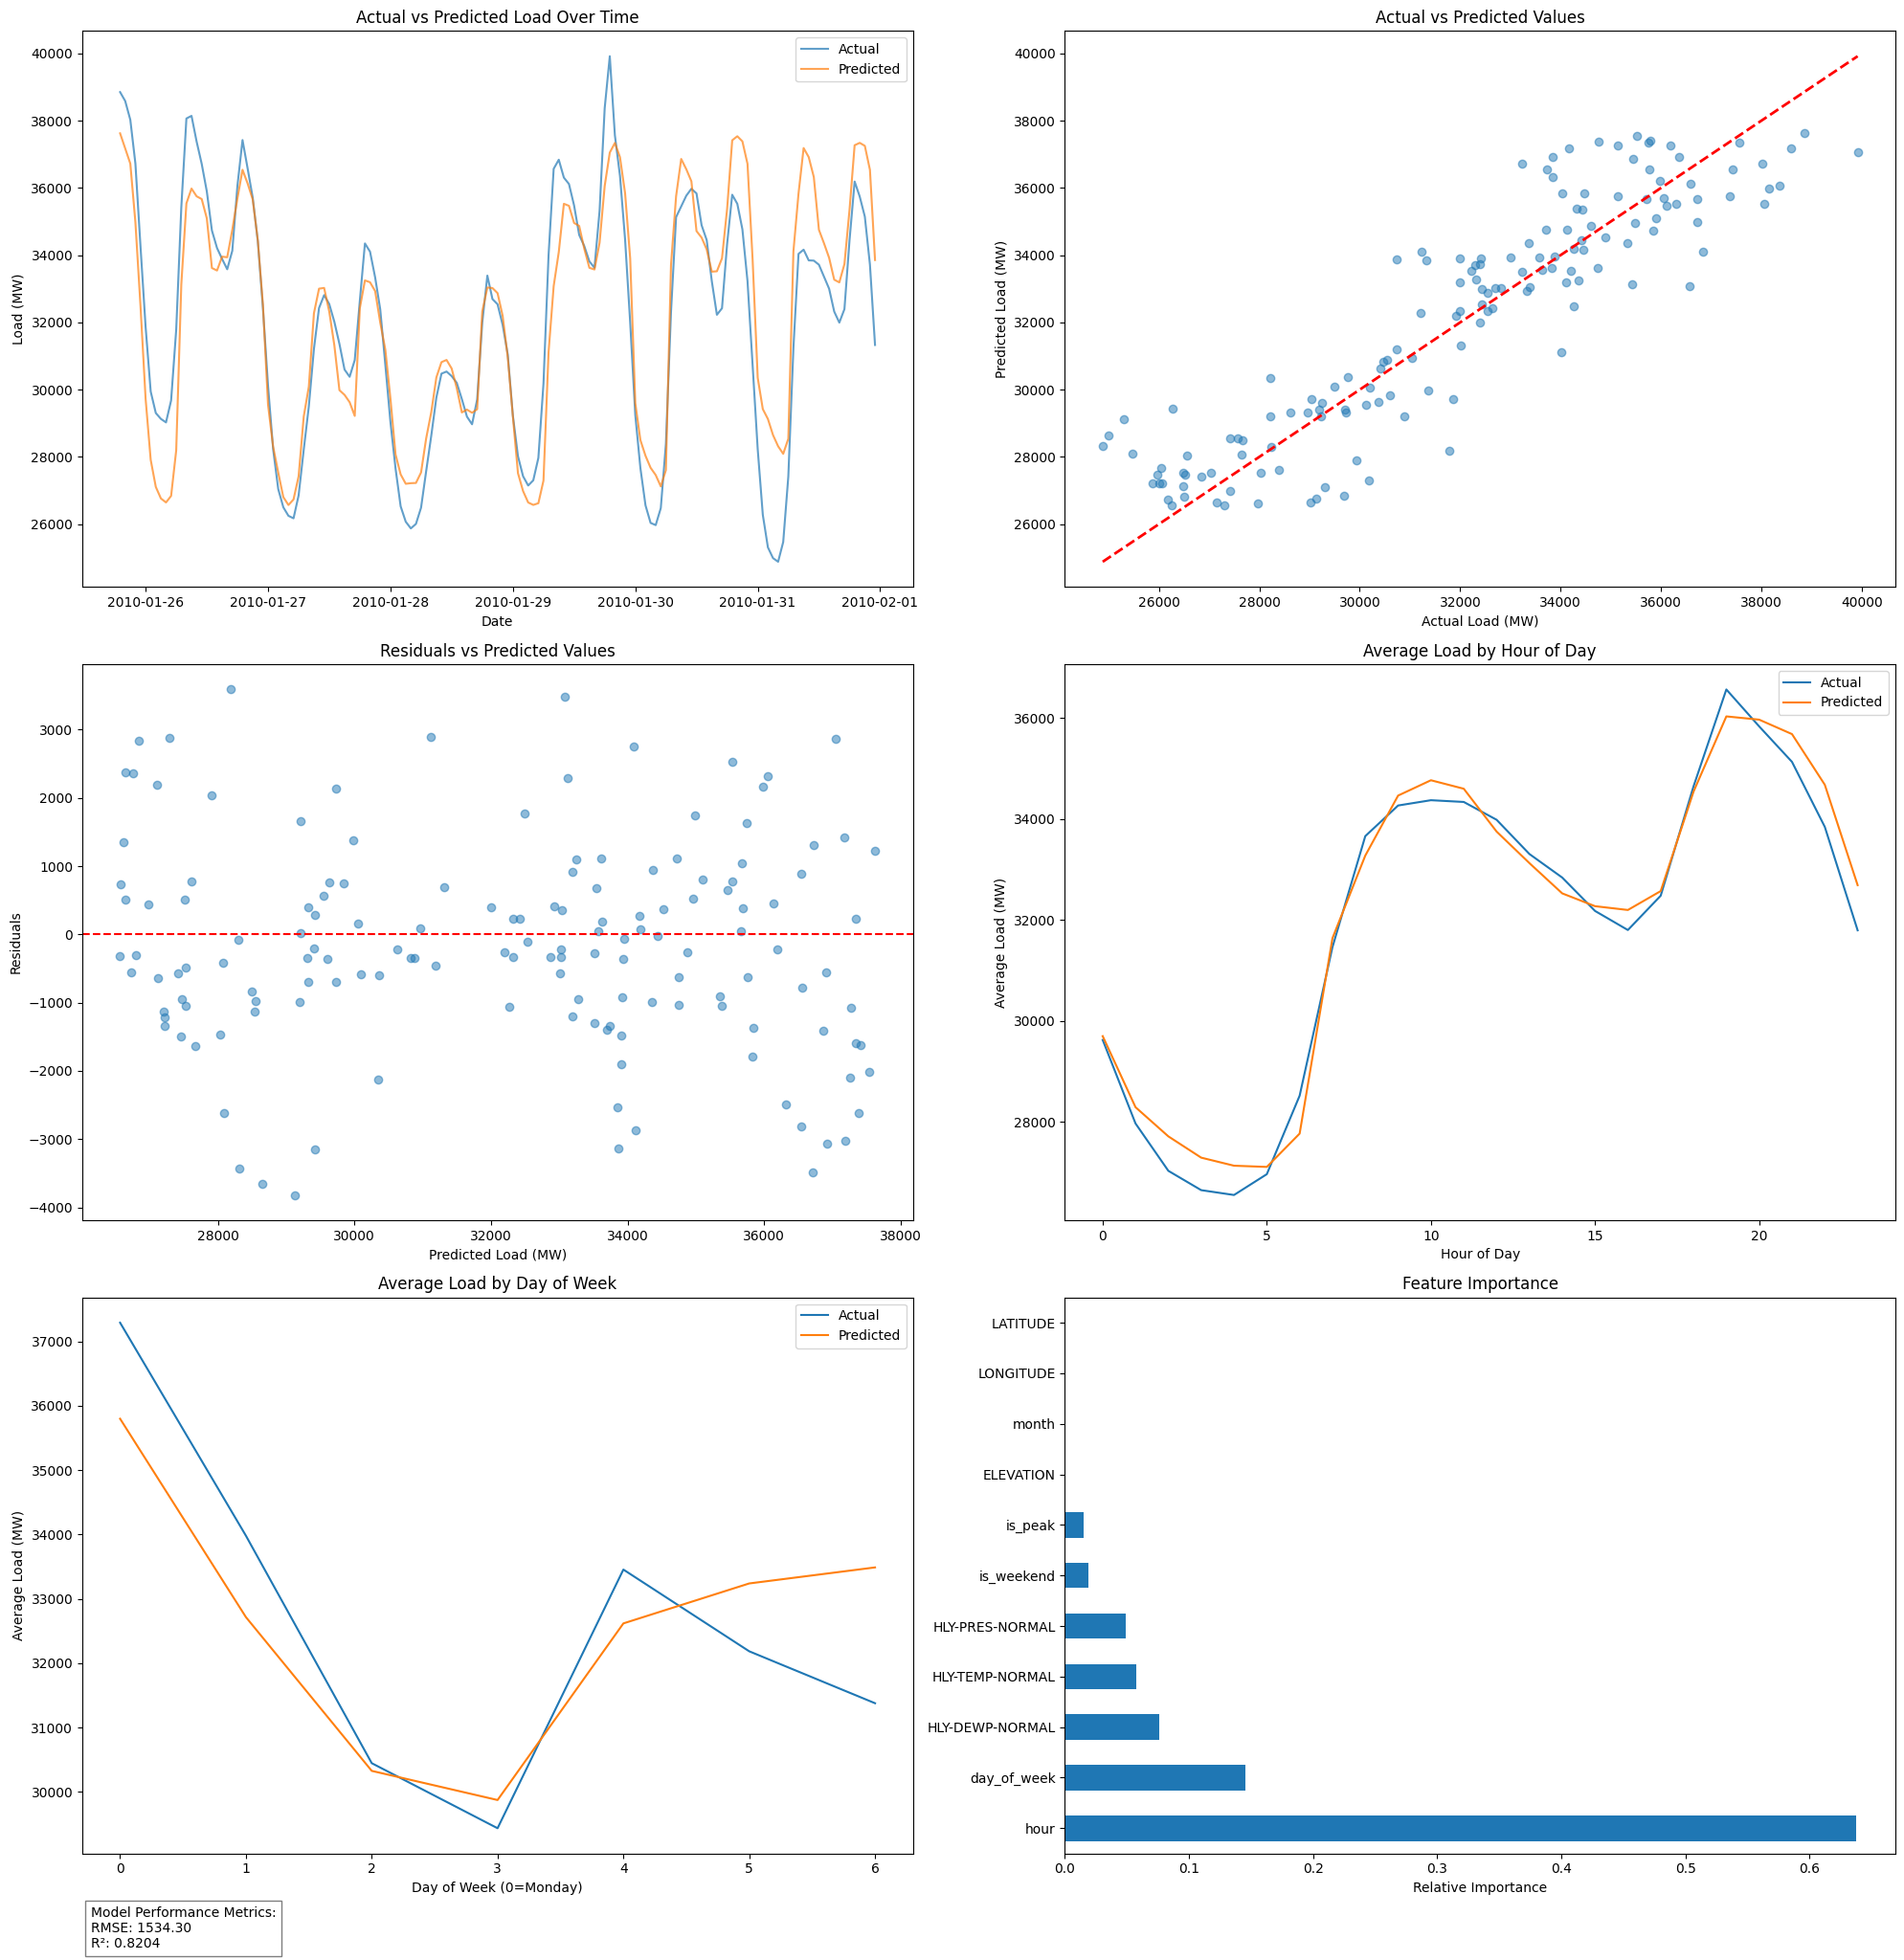

In [56]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Use a built-in matplotlib style
plt.style.use("default")

# Create a figure with multiple subplots
fig = plt.figure(figsize=(20, 20))

# 1. Actual vs Predicted Time Series
ax1 = plt.subplot(3, 2, 1)
ax1.plot(X_test.index, y_test, label="Actual", alpha=0.7)
ax1.plot(X_test.index, y_pred, label="Predicted", alpha=0.7)
ax1.set_title("Actual vs Predicted Load Over Time")
ax1.set_xlabel("Date")
ax1.set_ylabel("Load (MW)")
ax1.legend()

# 2. Scatter plot of Actual vs Predicted
ax2 = plt.subplot(3, 2, 2)
ax2.scatter(y_test, y_pred, alpha=0.5)
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2)
ax2.set_title("Actual vs Predicted Values")
ax2.set_xlabel("Actual Load (MW)")
ax2.set_ylabel("Predicted Load (MW)")

# 3. Residual Plot
residuals = y_test - y_pred
ax3 = plt.subplot(3, 2, 3)
ax3.scatter(y_pred, residuals, alpha=0.5)
ax3.axhline(y=0, color="r", linestyle="--")
ax3.set_title("Residuals vs Predicted Values")
ax3.set_xlabel("Predicted Load (MW)")
ax3.set_ylabel("Residuals")

# 4. Hourly Pattern
hourly_actual = y_test.groupby(X_test["hour"]).mean()
hourly_pred = pd.Series(y_pred, index=X_test.index).groupby(X_test["hour"]).mean()
ax4 = plt.subplot(3, 2, 4)
hourly_actual.plot(label="Actual", ax=ax4)
hourly_pred.plot(label="Predicted", ax=ax4)
ax4.set_title("Average Load by Hour of Day")
ax4.set_xlabel("Hour of Day")
ax4.set_ylabel("Average Load (MW)")
ax4.legend()

# 5. Day of Week Pattern
dow_actual = y_test.groupby(X_test["day_of_week"]).mean()
dow_pred = pd.Series(y_pred, index=X_test.index).groupby(X_test["day_of_week"]).mean()
ax5 = plt.subplot(3, 2, 5)
dow_actual.plot(label="Actual", ax=ax5)
dow_pred.plot(label="Predicted", ax=ax5)
ax5.set_title("Average Load by Day of Week")
ax5.set_xlabel("Day of Week (0=Monday)")
ax5.set_ylabel("Average Load (MW)")
ax5.legend()

# 6. Feature Importance
feature_importance = pd.Series(model.feature_importances_, index=features)
feature_importance = feature_importance.sort_values(ascending=False)
ax6 = plt.subplot(3, 2, 6)
feature_importance.plot(kind="barh", ax=ax6)
ax6.set_title("Feature Importance")
ax6.set_xlabel("Relative Importance")

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Add metrics to the plot
plt.figtext(
    0.05,  # x position (0 is left, 1 is right)
    -0.02,  # y position (negative moves it below the figure)
    f"Model Performance Metrics:\nRMSE: {rmse:.2f}\nR²: {r2:.4f}",
    bbox=dict(facecolor="white", alpha=0.5),
    ha="left",  # horizontal alignment
)


plt.tight_layout()
plt.show()
